<H1>Global Inflatin Asean  (ID) </h1>
Study/latihan
<h2>Importing</h2>
Data Source: https://datos.bancomundial.org/indicador/FP.CPI.TOTL.ZG?end=2023&start=1960&view=chart



In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


In [62]:
data = pd.read_csv("global_inflation_countries.csv")

<H2>Data exploration</h2>

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13760 non-null  object 
 1   country_name         13760 non-null  object 
 2   region               8320 non-null   object 
 3   sub_region           13760 non-null  object 
 4   intermediate_region  5760 non-null   object 
 5   indicator_code       13760 non-null  object 
 6   indicator_name       13760 non-null  object 
 7   year                 13760 non-null  int64  
 8   inflation_rate       13760 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 967.6+ KB


<h3>Data information</h3>

*   country_code: A unique identifier for each country, usually consisting of a standardized set of letters or numbers.

*   country_name: The name of the country, such as "Indonesia" or "Malaysia."

*   region: A broader geographical area to which the country belongs, such as "Asia" or "Europe."

*   sub_region: A more specific geographical area within the region, like "Southeast Asia" within Asia.

*   intermediate_region: An even more specific geographical classification that falls between sub_region and country, which may be used for statistical purposes.

*   indicator_code: A unique code representing a specific indicator or metric being measured, such as GDP, literacy rate, or inflation rate.

*   indicator_name: The name of the indicator or metric being measured, which provides more detail about what the indicator_code represents.

*   year: The year in which the data was collected or is being reported.

*   inflation_rate: The rate at which the general level of prices for goods and services is rising, and subsequently, how purchasing power is falling.

In [64]:
data.describe()

,year,inflation_rate
count,13760.000000,13760.000000
mean,1991.500000,14.733366
std,18.473624,258.045563
min,1960.000000,-17.640424
25%,1975.750000,0.000000
50%,1991.500000,1.807483
75%,2007.250000,6.694660
max,2023.000000,23773.131774


In [65]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13755    False
13756    False
13757    False
13758    False
13759    False
Length: 13760, dtype: bool

In [66]:
data.isna().sum()

country_code              0
country_name              0
region                 5440
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64

In [67]:
data['country_name'].unique()
data['intermediate_region'].unique()
data['sub_region'].unique()

array(['SOUTHERN ASIA', 'SOUTHERN EUROPE', 'WESTERN EUROPE',
       'SUB-SAHARAN AFRICA', 'LATIN AMERICA AND THE CARIBBEAN',
       'WESTERN ASIA', 'NORTHERN AFRICA', 'AUSTRALIA AND NEW ZEALAND',
       'EASTERN EUROPE', 'NORTHERN AMERICA', 'SOUTH-EASTERN ASIA',
       'EASTERN ASIA', 'NORTHERN EUROPE', 'MELANESIA', 'MICRONESIA',
       'CENTRAL ASIA', 'POLYNESIA'], dtype=object)

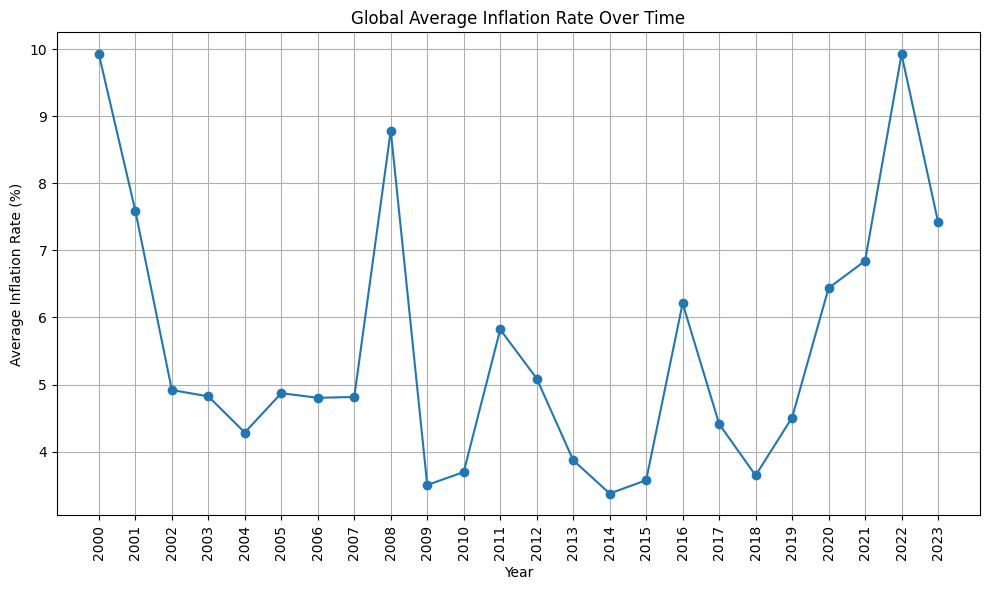

In [68]:

filtered_data = data[data['year'] >= 2000]

global_inflation = filtered_data.groupby('year')['inflation_rate'].mean()

# Plot the global inflation trend over time
plt.figure(figsize=(10, 6))  
plt.plot(global_inflation.index, global_inflation.values, marker='o', linestyle='-')
plt.title('Global Average Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.grid(True)  
plt.xticks(global_inflation.index, rotation=90) 
plt.tight_layout() 
plt.show()



After 2000, there was a significant decline in the inflation rate. The period between 2002 to 2007 showed relative stability with a low and stable inflation rate below 5%.

In 2008, there was a sharp jump in the inflation rate, approaching 9%. This was most likely caused by the global financial crisis that occurred at that time.

There will be a very significant increase in inflation in 2022. This is most likely the effect of the Covid-19 pandemic which disrupted the global supply chain, and also the effect of the Russia-Ukraine war which caused energy prices to increase.

---

Setelah tahun 2000, terjadi penurunan yang signifikan dalam tingkat inflasi. Periode antara 2002 hingga 2007 menunjukkan stabilitas relatif dengan tingkat inflasi yang rendah dan stabil di bawah 5%.

Pada tahun 2008, terjadi lonjakan tajam dalam tingkat inflasi, mendekati 9%. Ini kemungkinan besar disebabkan oleh krisis keuangan global yang terjadi pada saat itu.

Terlihat peningkatan inflasi yang sangat signifikan di tahun 2022. Ini kemungkinan besar efek dari pandemi covid-19 yang mengganggu rantai pasok global, dan juga efek dari perang rusia-ukraina yang membuat harga energi meningkat.

In [69]:
print("Global Inflation Summary:")
print(global_inflation.describe())

yearly_change = global_inflation.pct_change() * 100
print("\nYearly Change in Global Inflation:")
print(yearly_change)

Global Inflation Summary:
count    24.000000
mean      5.548040
std       1.966102
min       3.373602
25%       4.180558
50%       4.846747
75%       6.540427
max       9.927084
Name: inflation_rate, dtype: float64

Yearly Change in Global Inflation:
year
2000          NaN
2001   -23.526506
2002   -35.209976
2003    -1.941871
2004   -11.176830
2005    13.700291
2006    -1.414359
2007     0.255552
2008    82.573012
2009   -60.169671
2010     5.532339
2011    57.579883
2012   -12.581631
2013   -23.939410
2014   -12.846759
2015     5.884706
2016    73.907616
2017   -28.984288
2018   -17.415393
2019    23.713982
2020    42.857553
2021     6.298164
2022    45.035638
2023   -25.187152
Name: inflation_rate, dtype: float64


In [70]:

# Filter for SOUTH-EASTERN ASIA
asean_data = data[data['sub_region'] == 'SOUTH-EASTERN ASIA']


In [71]:
asean_data['country_name'].unique()

array(['BRUNEI DARUSSALAM', 'CAMBOYA', 'FILIPINAS', 'INDONESIA',
       'MALASIA', 'MYANMAR', 'REPUBLICA DEMOCRATICA POPULAR LAO',
       'SINGAPUR', 'TAILANDIA', 'TIMOR-LESTE', 'VIET NAM'], dtype=object)

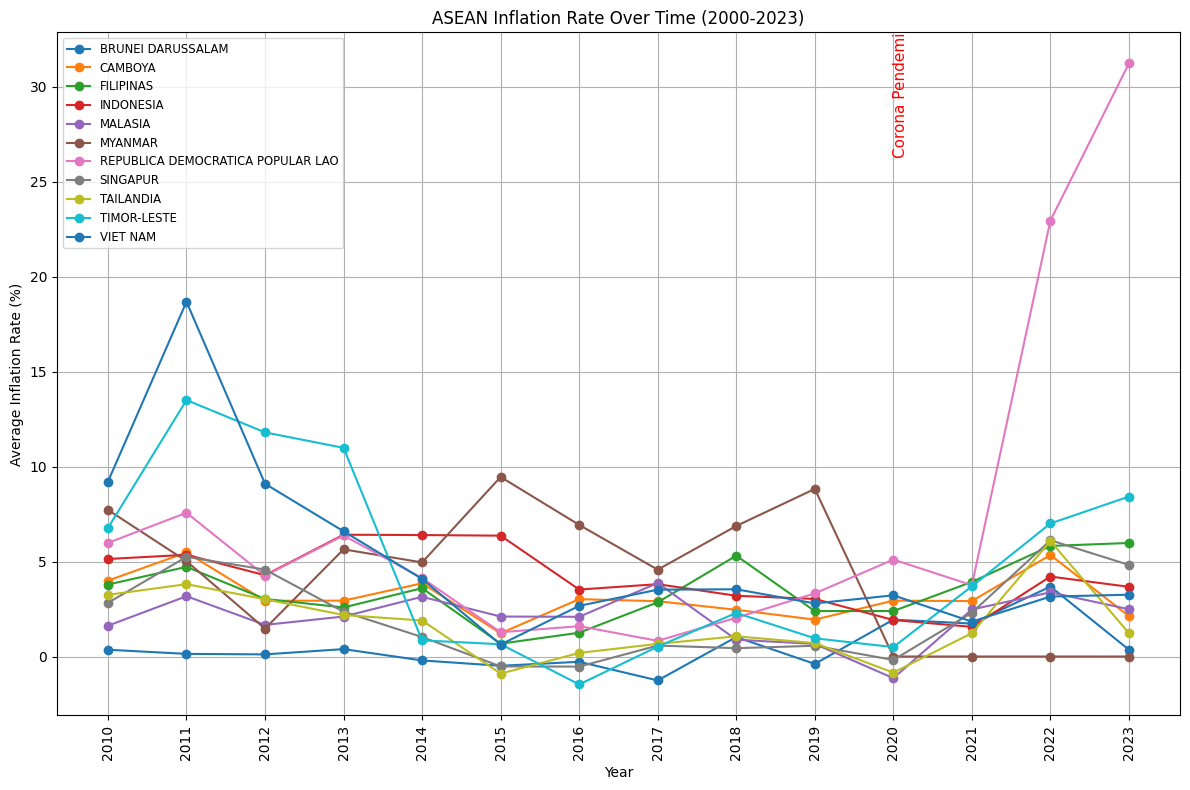

In [72]:

filtered_data = asean_data[asean_data['year'] >= 2010]

asean_avg_inflation = filtered_data.groupby(['year', 'country_name'])['inflation_rate'].mean().reset_index()

plt.figure(figsize=(12, 8))

for country in asean_avg_inflation['country_name'].unique():  #
    country_data = asean_avg_inflation[asean_avg_inflation['country_name'] == country]
    plt.plot(country_data['year'], country_data['inflation_rate'], marker='o', linestyle='-', label=country)


#informasi tambahan
plt.text(2020, plt.ylim()[1], 'Corona Pendemi', rotation=90, verticalalignment='top', fontsize=11,color='red')

plt.title('ASEAN Inflation Rate Over Time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.grid(True)
plt.xticks(range(2010, 2024), rotation=90)
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

It can be seen how global events such as the COVID-19 pandemic crisis affect inflation levels throughout the ASEAN region.
There is clearly a sharp increase in the Lao People's Democratic Republic from 2022 to 2023.

---

Terlihat bagaimana peristiwa global seperti krisis  pandemi COVID-19 memengaruhi tingkat inflasi di seluruh kawasan ASEAN.
Terlihat jelas lonjakan tajam pada negara Republik Demokratik Rakyat Laos di tahun 2022 hinga 2023.

In [73]:
# Print summary statistics for Indonesia
print("ASEAN Inflation Summary:")
print(asean_data['inflation_rate'].describe())

# Calculate and print yearly change for Indonesia
yearly_change = asean_data['inflation_rate'].pct_change() * 100
print("\nYearly Change in ASEAN Inflation:")
print(yearly_change)


ASEAN Inflation Summary:
count     704.000000
mean        8.062128
std        46.243749
min        -6.044706
25%         0.000000
50%         2.358705
75%         6.365198
max      1136.254112
Name: inflation_rate, dtype: float64

Yearly Change in ASEAN Inflation:
1792           NaN
1793           NaN
1794           NaN
1795           NaN
1796           NaN
           ...    
13563   -21.013631
13564    15.205204
13565   -43.037785
13566    72.043427
13567     3.053543
Name: inflation_rate, Length: 704, dtype: float64


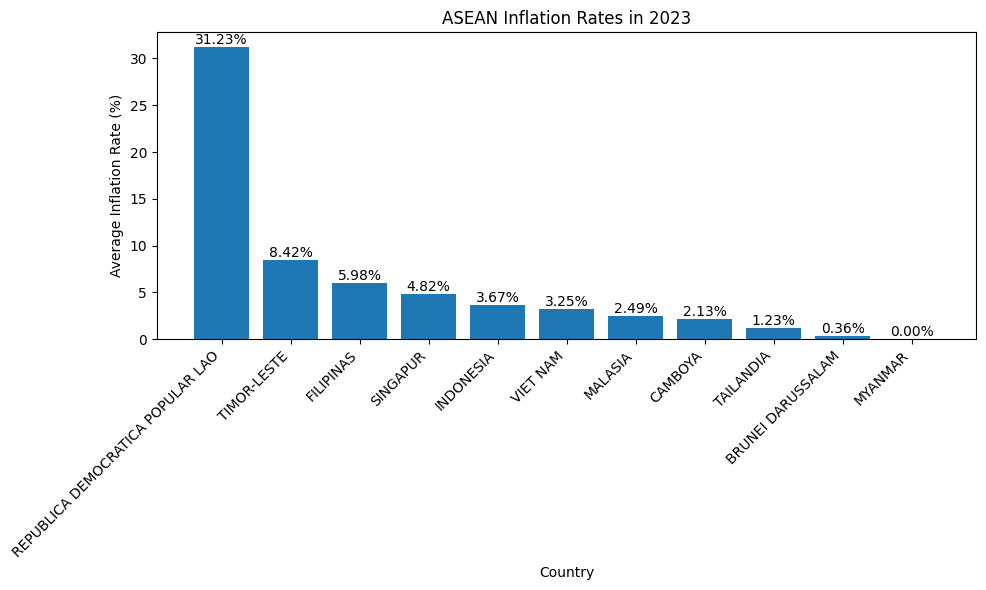

In [74]:

# Filter for the year 2023
asean_2023 = asean_data[asean_data['year'] == 2023]

# Group by country and calculate the average inflation rate for 2023
asean_2023_avg = asean_2023.groupby('country_name')['inflation_rate'].mean().reset_index()

asean_2023_sorted = asean_2023_avg.sort_values(by='inflation_rate', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(asean_2023_sorted['country_name'], asean_2023_sorted['inflation_rate'])
plt.title("ASEAN Inflation Rates in 2023")
plt.xlabel("Country")
plt.ylabel("Average Inflation Rate (%)")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

<div class="alert alert-block alert-warning">
<b>info:</b> data untuk MYAMAR tidak ada sejak 2020 - 2023
</div>

<h2>Analysis indonesia</h2>

In [75]:
# Filter for ndonesia
INDONESIA_data = data[data['country_name'] == 'INDONESIA']

In [76]:
INDONESIA_data.columns


Index(['country_code', 'country_name', 'region', 'sub_region',
       'intermediate_region', 'indicator_code', 'indicator_name', 'year',
       'inflation_rate'],
      dtype='object')

In [77]:
#List of presidents of indonesia
presidens_list = [
    {"year": 1960, "peresiden": "Sukarno"},
    {"year": 1962, "peresiden": "Sukarno"},
    {"year": 1963, "peresiden": "Sukarno"},
    {"year": 1964, "peresiden": "Sukarno"},
    {"year": 1965, "peresiden": "Sukarno"},
    {"year": 1961, "peresiden": "Sukarno"},
    {"year": 1966, "peresiden": "Sukarno"},
    {"year": 1967, "peresiden": "Suharto"},
    {"year": 1968, "peresiden": "Suharto"},
    {"year": 1969, "peresiden": "Suharto"},
    {"year": 1970, "peresiden": "Suharto"},
    {"year": 1971, "peresiden": "Suharto"},
    {"year": 1972, "peresiden": "Suharto"},
    {"year": 1973, "peresiden": "Suharto"},
    {"year": 1974, "peresiden": "Suharto"},
    {"year": 1975, "peresiden": "Suharto"},
    {"year": 1976, "peresiden": "Suharto"},
    {"year": 1977, "peresiden": "Suharto"},
    {"year": 1978, "peresiden": "Suharto"},
    {"year": 1979, "peresiden": "Suharto"},
    {"year": 1980, "peresiden": "Suharto"},
    {"year": 1981, "peresiden": "Suharto"},
    {"year": 1982, "peresiden": "Suharto"},
    {"year": 1983, "peresiden": "Suharto"},
    {"year": 1984, "peresiden": "Suharto"},
    {"year": 1985, "peresiden": "Suharto"},
    {"year": 1986, "peresiden": "Suharto"},
    {"year": 1987, "peresiden": "Suharto"},
    {"year": 1988, "peresiden": "Suharto"},
    {"year": 1989, "peresiden": "Suharto"},
    {"year": 1990, "peresiden": "Suharto"},
    {"year": 1991, "peresiden": "Suharto"},
    {"year": 1992, "peresiden": "Suharto"},
    {"year": 1993, "peresiden": "Suharto"},
    {"year": 1994, "peresiden": "Suharto"},
    {"year": 1995, "peresiden": "Suharto"},
    {"year": 1996, "peresiden": "Suharto"},
    {"year": 1997, "peresiden": "Suharto"},
    {"year": 1998, "peresiden": "B. J. Habibie"},
    {"year": 1999, "peresiden": "Abdurrahman Wahid"},
    {"year": 2000, "peresiden": "Abdurrahman Wahid"},
    {"year": 2001, "peresiden": "Megawati Soekarnoputri"},
    {"year": 2002, "peresiden": "Megawati Soekarnoputri"},
    {"year": 2003, "peresiden": "Megawati Soekarnoputri"},
    {"year": 2004, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2005, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2006, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2007, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2008, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2009, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2010, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2011, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2012, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2013, "peresiden": "Susilo Bambang Yudhoyono"},
    {"year": 2014, "peresiden": "Joko Widodo"},
    {"year": 2015, "peresiden": "Joko Widodo"},
    {"year": 2016, "peresiden": "Joko Widodo"},
    {"year": 2017, "peresiden": "Joko Widodo"},
    {"year": 2018, "peresiden": "Joko Widodo"},
    {"year": 2019, "peresiden": "Joko Widodo"},
    {"year": 2020, "peresiden": "Joko Widodo"},
    {"year": 2021, "peresiden": "Joko Widodo"},
    {"year": 2022, "peresiden": "Joko Widodo"},
    {"year": 2023, "peresiden": "Joko Widodo"},
]

In [78]:
data_presiden = pd.DataFrame(presidens_list)

data_gabung = pd.merge(INDONESIA_data, data_presiden, on='year', how='left')

In [79]:
data_gabung.head(5)

,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate,peresiden
0,IDN,INDONESIA,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,SOUTH-EASTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,39.590444,Sukarno
1,IDN,INDONESIA,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,SOUTH-EASTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,13.691932,Sukarno
2,IDN,INDONESIA,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,SOUTH-EASTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,131.397849,Sukarno
3,IDN,INDONESIA,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,SOUTH-EASTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,145.910781,Sukarno
4,IDN,INDONESIA,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,SOUTH-EASTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,108.994709,Sukarno


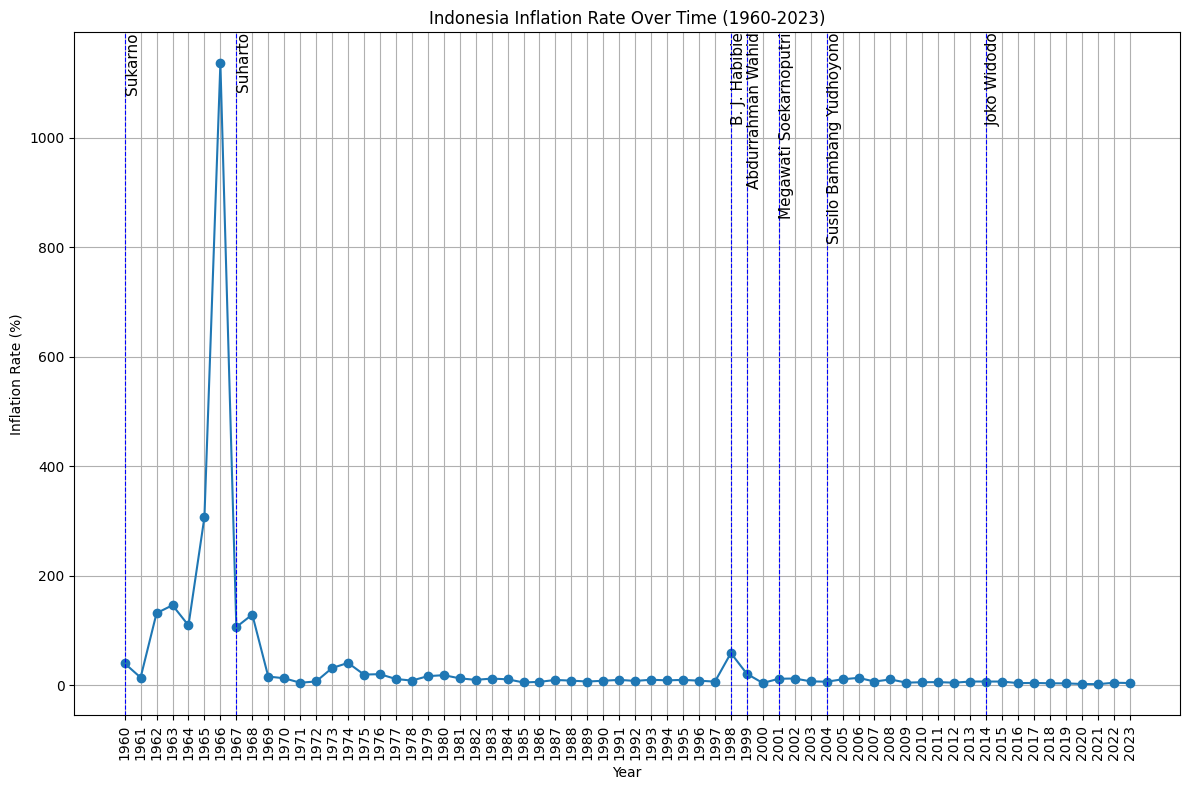

In [80]:
data_sorted = data_gabung.sort_values(by='year')
filtered_data = asean_data[asean_data['year'] >= 2010]
# line chart
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['year'], data_sorted['inflation_rate'], marker='o', linestyle='-')

# Menambahkan anotasi untuk perubahan presiden
presiden_changes = data_sorted.drop_duplicates(subset='peresiden', keep='first')
for index, row in presiden_changes.iterrows():
    plt.axvline(x=row['year'], color='blue', linestyle='--', linewidth=0.8)  
    plt.text(row['year'], plt.ylim()[1], row['peresiden'], rotation=90, verticalalignment='top', fontsize=11)  # Anotasi nama presiden

plt.title('Indonesia Inflation Rate Over Time (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(sorted(data_gabung['year'].unique()), rotation=90)
plt.tight_layout()
plt.show()

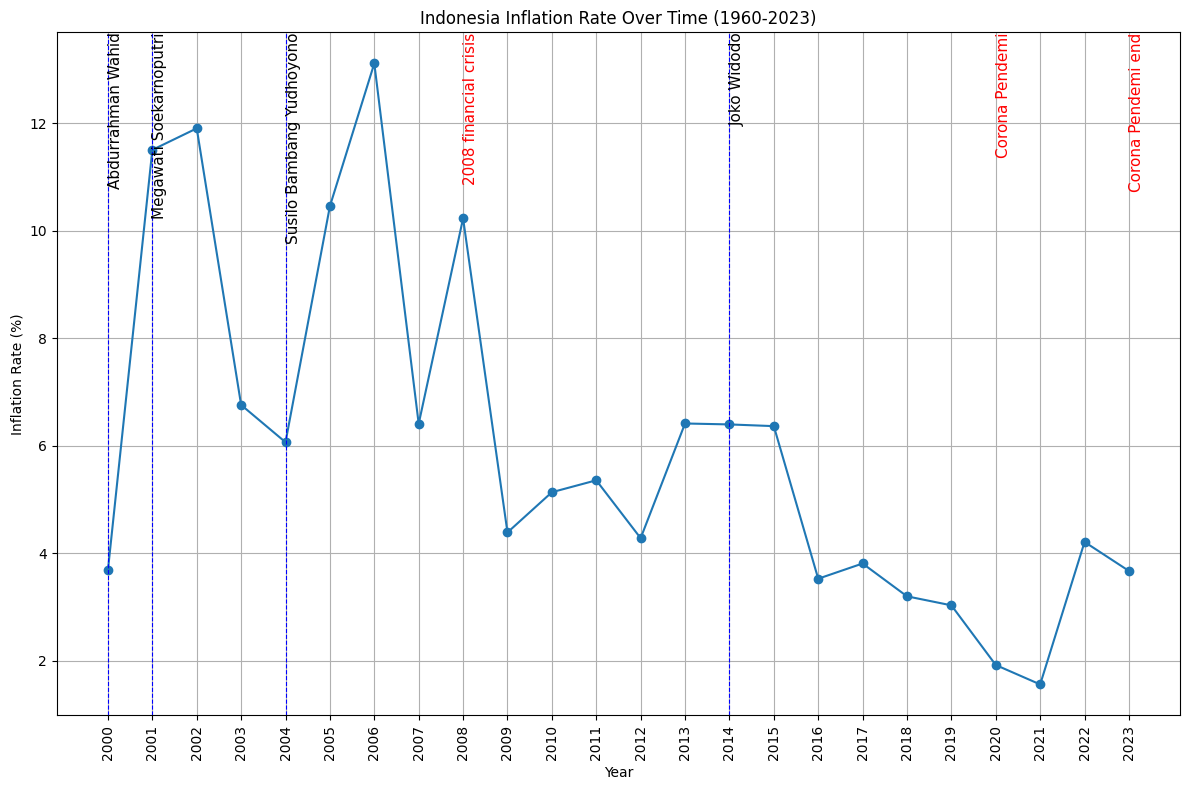

<Figure size 640x480 with 0 Axes>

In [81]:
data_sorted = data_gabung.sort_values(by='year')
filtered_data = data_sorted[data_sorted['year'] >= 2000]
# line chart
plt.figure(figsize=(12, 8))
plt.plot(filtered_data['year'], filtered_data['inflation_rate'], marker='o', linestyle='-')

# Menambahkan anotasi untuk perubahan presiden
presiden_changes = filtered_data.drop_duplicates(subset='peresiden', keep='first')
for index, row in presiden_changes.iterrows():
    plt.axvline(x=row['year'], color='blue', linestyle='--', linewidth=0.8)  
    plt.text(row['year'], plt.ylim()[1], row['peresiden'], rotation=90, verticalalignment='top', fontsize=11) 

plt.title('Indonesia Inflation Rate Over Time (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)

#informasi tambahan

plt.text(2008, plt.ylim()[1], '2008 financial crisis', rotation=90, verticalalignment='top', fontsize=11,color='red')
plt.text(2020, plt.ylim()[1], 'Corona Pendemi', rotation=90, verticalalignment='top', fontsize=11,color='red')
plt.text(2023, plt.ylim()[1], 'Corona Pendemi end', rotation=90, verticalalignment='top', fontsize=11,color='red')

# Membuat label xticks secara eksplisit
xticks_positions = sorted(filtered_data['year'].unique())
xticks_labels = [str(year) for year in xticks_positions]  # Mengubah tahun menjadi string

plt.xticks(xticks_positions, xticks_labels, rotation=90)  

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

Key Points:
1.  Awal Periode (2000-2004):
Tingkat inflasi relatif tinggi, mencapai puncaknya di bawah pemerintahan Abdurrahman Wahid dan Megawati Soekarnoputri.
Ini mungkin disebabkan oleh ketidakstabilan politik dan ekonomi pada masa transisi setelah krisis keuangan Asia 1997-1998.
2.  Periode Susilo Bambang Yudhoyono (2004-2014):
Tingkat inflasi cenderung menurun dan stabil, meskipun ada lonjakan pada tahun 2008 akibat krisis keuangan global.
Kebijakan ekonomi yang lebih stabil dan pengelolaan inflasi yang lebih baik mungkin berperan dalam hal ini.
3.  Periode Joko Widodo (2014-Sekarang):
Tingkat inflasi relatif rendah dan stabil, meskipun ada sedikit peningkatan pada tahun 2022 akibat pandemi COVID-19.
Kebijakan stabilisasi harga dan pengelolaan rantai pasokan mungkin berkontribusi pada stabilitas ini.
4.  Dampak Krisis Global:
Krisis keuangan 2008 dan pandemi COVID-19 memiliki dampak yang signifikan terhadap inflasi Indonesia, meskipun dampaknya relatif terkendali dibandingkan dengan negara lain.

TIMES SERIES

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [88]:
# Ubah kolom 'year' menjadi datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Atur 'year' sebagai index
data.set_index('year', inplace=True)

# Pilih data inflasi Indonesia
inflasi_indonesia = data[data['country_name'] == 'INDONESIA']['inflation_rate']

# Buat time series
time_series_inflasi = inflasi_indonesia.asfreq('YS') # YS artinya year start

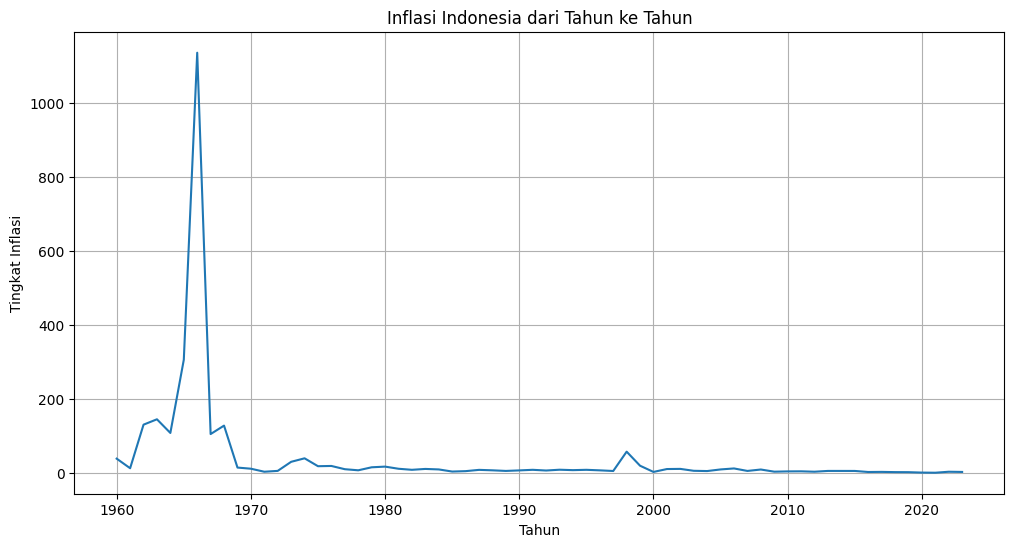

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_inflasi)
plt.title('Inflasi Indonesia dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Inflasi')
plt.grid(True)
plt.show()

In [90]:
model = ARIMA(time_series_inflasi, order=(5, 2, 0))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps=7) 

print(forecast)

2024-01-01    3.203170
2025-01-01    3.389466
2026-01-01    3.586225
2027-01-01    3.970627
2028-01-01    4.501569
2029-01-01    4.148480
2030-01-01    4.318262
Freq: YS-JAN, Name: predicted_mean, dtype: float64


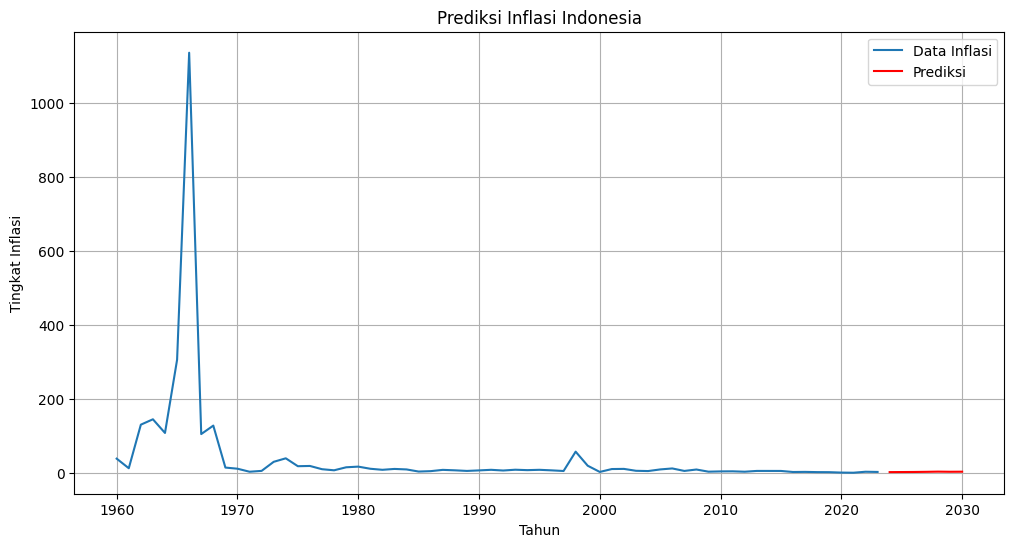

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_inflasi, label='Data Inflasi')
plt.plot(pd.date_range(time_series_inflasi.index[-1], periods=8, freq='YS')[1:], forecast, label='Prediksi', color='red')
plt.title('Prediksi Inflasi Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Inflasi')
plt.legend()
plt.grid(True)
plt.show()